<a href="https://colab.research.google.com/github/Ankur3107/GitHub-Bugs-Prediction-Challenge/blob/main/exploration/Transformer_Model_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

     |████████████████████████████████| 1.1MB 3.4MB/s 
     |████████████████████████████████| 890kB 15.5MB/s 
     |████████████████████████████████| 3.0MB 26.5MB/s 
     |████████████████████████████████| 1.1MB 37.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=fa20fc2e28822dea70421d0d13d7f12b191dde4f5e846fc418aff06ce602776d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [6]:
from transformers import *
import pandas as pd
import numpy as np

In [3]:
!wget https://machinehack-be.s3.amazonaws.com/predict_github_issues_embold_sponsored_hackathon/Embold_Participant%27s_Dataset.zip
!unzip ./Embold_Participant\'s_Dataset.zip -d Dataset

--2020-10-11 03:43:55--  https://machinehack-be.s3.amazonaws.com/predict_github_issues_embold_sponsored_hackathon/Embold_Participant%27s_Dataset.zip
Resolving machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)... 52.219.64.24
Connecting to machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)|52.219.64.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102320961 (98M) [application/octet-stream]
Saving to: ‘Embold_Participant's_Dataset.zip’

Embold_Participant' 100%[===================>]  97.58M  10.2MB/s    in 11s     

2020-10-11 03:44:07 (8.85 MB/s) - ‘Embold_Participant's_Dataset.zip’ saved [102320961/102320961]

Archive:  ./Embold_Participant's_Dataset.zip
   creating: Dataset/Embold_Participant's_Dataset/
  inflating: Dataset/Embold_Participant's_Dataset/sample submission.csv  
  inflating: Dataset/__MACOSX/Embold_Participant's_Dataset/._sample submission.csv  
  inflating: Dataset/Embold_Participant's_Dataset/embold_train_extra

In [4]:
cd "Dataset/Embold_Participant's_Dataset/"

/content/Dataset/Embold_Participant's_Dataset


In [7]:
train_df = pd.read_json("embold_train.json").reset_index(drop=True)
train_df.head()

,title,body,label
0,y-zoom piano roll,a y-zoom on the piano roll would be useful.,1
1,buggy behavior in selection,! screenshot from 2016-02-23 21 27 40 https:/...,0
2,auto update feature,"hi,\r \r great job so far, @saenzramiro ! : \r...",1
3,filter out noisy endpoints in logs,i think we should stop logging requests to:\r ...,1
4,enable pid on / pid off alarm actions for ardu...,expected behavior\r alarm actions pid on and p...,0


In [8]:
test_df = pd.read_json("embold_test.json").reset_index(drop=True)
test_df.head()

,title,body
0,config question path-specific environment var...,issue description or question\r \r hey @artemg...
1,crash indien vol,de simulator crasht als hij vol zit
2,unable to mine rocks,"sarkasmo starting today, when i hit enter act..."
3,not all whitelists are processed,create following rules... order of creation is...
4,add ctx menu for idafree 70 and idafree 5,"associated with .dll, .dll_, .exe, .exe_, .sc,..."


In [9]:
train_ex_df = pd.read_json("embold_train_extra.json")
train_ex_df.head()

,title,body,label
0,use a 8bit typeface,since this is meant to emulate some old arcade...,1
1,implement wireless m-bus binding,_from chris.pa...@googlemail.com https://cod...,1
2,add multilang support for timeago.js,currently it is only en . \r required to add ...,1
3,scaleway - seg-fault on shutdown,tbr irc creates a new scaleway instance with...,0
4,sistema de pintura: no se guardar los nuevos p...,este sp ya estaba asignado a un carro y se enc...,0


In [10]:
train_data = train_df.append(train_ex_df)
test_df['text'] = test_df['title']+' '+test_df['body']
train_data['text'] = train_data['title']+' '+train_data['body']

In [11]:
test_df['text_len'] = test_df['text'].apply(lambda x: len(x.split(' ')))

In [14]:
train_data['text_len'] = train_data['text'].apply(lambda x: len(x.split(' ')))

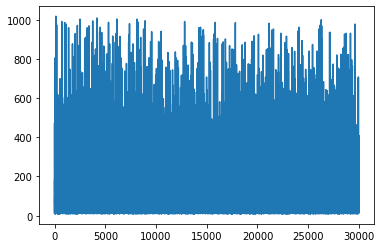

In [13]:
test_df['text_len'].plot()

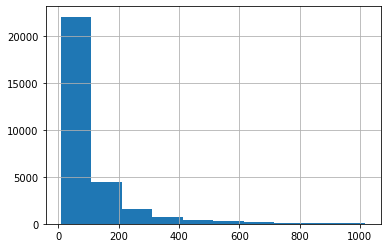

In [18]:
test_df['text_len'].hist()

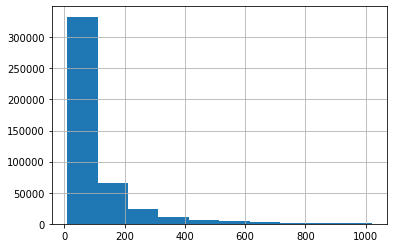

In [19]:
train_data['text_len'].hist()

In [20]:
!pip install nlp_profiler

     |████████████████████████████████| 1.4MB 6.8MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 788kB 10.5MB/s 
     |████████████████████████████████| 634kB 26.4MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 358kB 32.3MB/s 
     |████████████████████████████████| 460kB 27.4MB/s 
     |████████████████████████████████| 542kB 37.0MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 22.9MB 44.3MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 133kB 41.5MB/s 
     |████████████████████████████████| 1.2MB 42.8MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 204kB 49.0MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 2.9MB 33.1MB/s 
     |████████████████████████████████| 266kB 35.6MB/s 
    

In [21]:
test_df.head()

,title,body,text,text_len
0,config question path-specific environment var...,issue description or question\r \r hey @artemg...,config question path-specific environment var...,181
1,crash indien vol,de simulator crasht als hij vol zit,crash indien vol de simulator crasht als hij v...,10
2,unable to mine rocks,"sarkasmo starting today, when i hit enter act...","unable to mine rocks sarkasmo starting today, ...",473
3,not all whitelists are processed,create following rules... order of creation is...,not all whitelists are processed create follow...,186
4,add ctx menu for idafree 70 and idafree 5,"associated with .dll, .dll_, .exe, .exe_, .sc,...",add ctx menu for idafree 70 and idafree 5 asso...,19


In [23]:
from nlp_profiler.core import apply_text_profiling

new_text_column_dataset = apply_text_profiling(test_df[0:1000], 'text')

final params: {'high_level': True, 'granular': True, 'grammar_check': False, 'spelling_check': True, 'parallelisation_method': 'default'}


KeyboardInterrupt: ignored

In [28]:
train_data[train_data.label==2].head(10)

,title,body,label,text,text_len
7,proposal loadtranslation to lazy load scope...,php\r public function loadtranslation \r {\r ...,2,proposal loadtranslation to lazy load scope...,263
11,null or in jsonexporter,\r \ rows\ : {\r \ left\ : \r {\r ...,2,null or in jsonexporter \r \ rows\ : {\r ...,414
14,collectionprovider support pagination,it would be very helpful if support for pagina...,2,collectionprovider support pagination it woul...,38
16,i2cwrite error on debian 9.2: cannot read pro...,"would love for this to be working, but sadly, ...",2,i2cwrite error on debian 9.2: cannot read pro...,449
50,is performupdatesanimated always necessary whe...,i've been implementing iglistkit on my current...,2,is performupdatesanimated always necessary whe...,79
71,printing members in network,\r \r import scala.collection.mutable.arraybuf...,2,printing members in network \r \r import scala...,143
74,exceptionhandler nest can't resolve dependenc...,i'm submitting a...\r <!-- \r please search gi...,2,exceptionhandler nest can't resolve dependenc...,479
106,front end | what time is now?,need to develop a standard time for excluding ...,2,front end | what time is now? need to develop ...,57
107,how to connection to another tcp server/listen,1. client\r 2. workerman websocket server and...,2,how to connection to another tcp server/listen...,23
115,add functionality to clear additional post met...,let's say you create a bunch of batch processe...,2,add functionality to clear additional post met...,120


In [35]:
train_data[train_data.label==2].text.values[14]

"lctl_t with kc_caps doesn't work as intended i'm trying to set the a key to function as a  lctl  when held, but  caps  when tapped. to do this i use  ctl_t kc_caps  , however it doesn't function as i'd expect. it seems to toggle  caps  on and off immediately.\\r \\r if i use a different key for  caps  i can see that tapping the mapped control key turns it off.\\r \\r is this a limitation of this  ctl_t , or is there another way i can do this?"

In [ ]:
bug, feature, question